In [323]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
from datetime import datetime


In [324]:
# Import the animes.csv file
animes_df = pd.read_csv('animes.csv')

# Import the profile.csv file
profile_df = pd.read_csv('profiles.csv')

reviews_df = pd.read_csv('reviews.csv')


profiles = profile_df
animes = animes_df
reviews = reviews_df


In [325]:
animes_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [326]:
profile_df.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [327]:
reviews_df.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [328]:
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [329]:
profile_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorites_anime  81727 non-null  object
 4   link             81727 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [330]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


In [331]:
profile_df.isnull().sum()

profile                0
gender             27871
birthday           34920
favorites_anime        0
link                   0
dtype: int64

In [332]:
animes_df.isnull().sum()

uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64

In [333]:
reviews_df.isnull().sum()

uid          0
profile      0
anime_uid    0
text         0
score        0
scores       0
link         0
dtype: int64

# Data Visualization

In [334]:
# Create an empty list to store the separated data

separated_data_rows = []
new_df = animes_df

# Iterate over each row in the DataFrame
for index, row in new_df.iterrows():
    # Split the genres in the current row into a list
    genres_list = row['genre'].strip('[]').replace("'", "").split(', ')
    
    # Iterate over each genre in the genres list
    for genre in genres_list:
        # Append a new row to the separated_data_rows list with the genre, aired, and popularity values from the current row
        separated_data_rows.append({'Genre': genre, 'Aired': row['aired'], 'Popularity': row['popularity']})

# Convert the list of rows into a DataFrame
separated_data = pd.DataFrame(separated_data_rows)

# Now you have a DataFrame with each genre separated into new rows and their respective 'aired' and 'popularity' values
print(separated_data)

          Genre                        Aired  Popularity
0        Comedy  Oct 4, 2015 to Mar 27, 2016         141
1        Sports  Oct 4, 2015 to Mar 27, 2016         141
2         Drama  Oct 4, 2015 to Mar 27, 2016         141
3        School  Oct 4, 2015 to Mar 27, 2016         141
4       Shounen  Oct 4, 2015 to Mar 27, 2016         141
...         ...                          ...         ...
55658  Military                 Mar 12, 1988        2604
55659    Sci-Fi                 Mar 12, 1988        2604
55660     Space                 Mar 12, 1988        2604
55661     Drama                 Mar 12, 1988        2604
55662     Mecha                 Mar 12, 1988        2604

[55663 rows x 3 columns]


In [335]:

separated_data = separated_data[separated_data['Genre'] != '']
separated_data['Genre'].unique() 

array(['Comedy', 'Sports', 'Drama', 'School', 'Shounen', 'Music',
       'Romance', 'Sci-Fi', 'Adventure', 'Mystery', 'Fantasy', 'Action',
       'Military', 'Magic', 'Supernatural', 'Vampire', 'Slice of Life',
       'Demons', 'Historical', 'Super Power', 'Mecha', 'Parody',
       'Samurai', 'Seinen', 'Police', 'Psychological', 'Josei', 'Space',
       'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror', 'Shounen Ai',
       'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia', 'Harem',
       'Hentai', 'Yaoi', 'Yuri'], dtype=object)

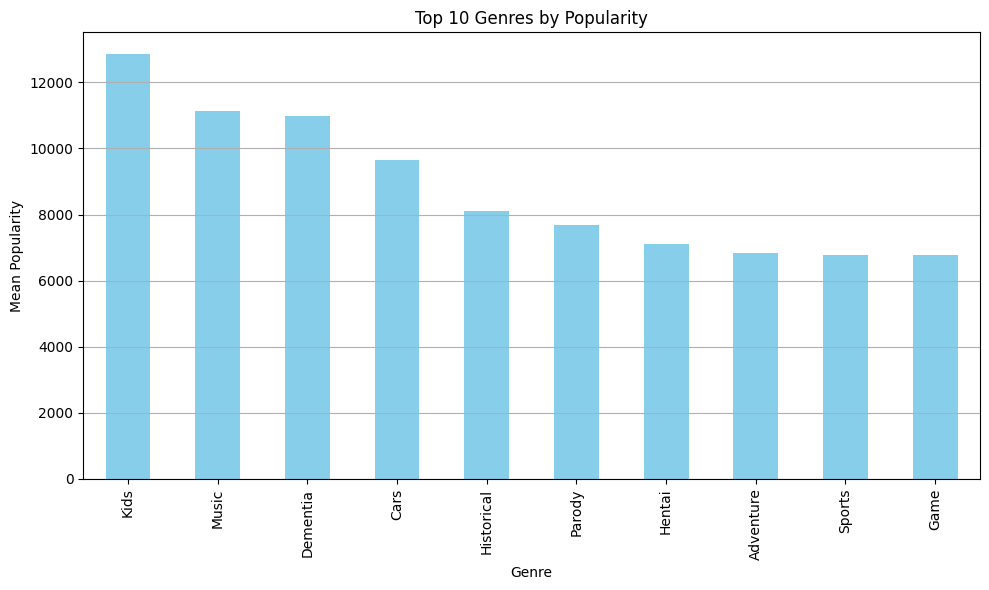

In [336]:
# Group the data by genre and calculate the mean popularity for each genre
genre_popularity = separated_data.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)

# Select the top 10 genres by popularity
top_10_genre_popularity = genre_popularity.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

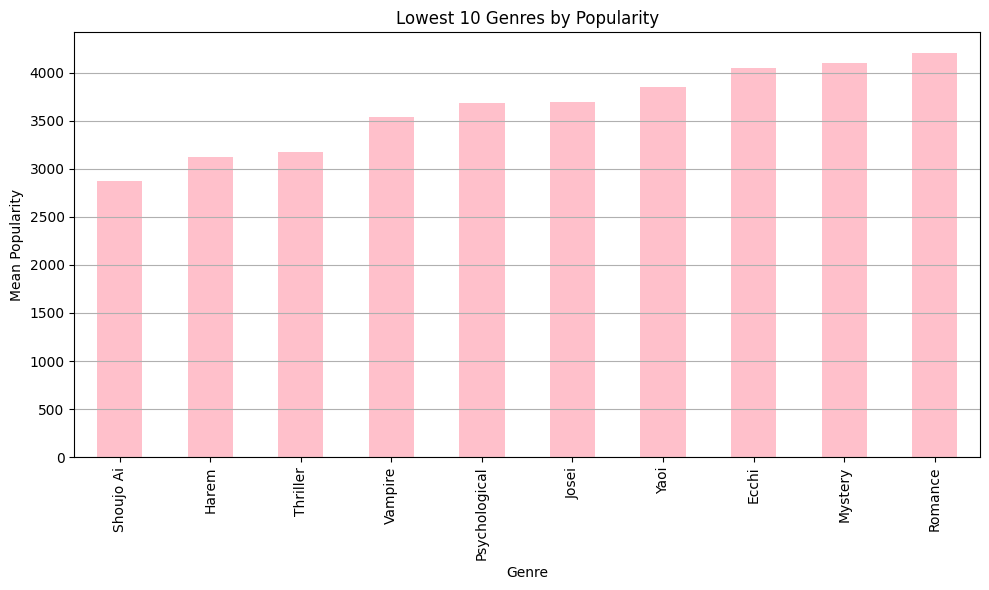

In [337]:
# Group the data by genre and calculate the mean popularity for each genre
genre_popularity = separated_data.groupby('Genre')['Popularity'].mean().sort_values(ascending=True)

# Select the Lowest 10 genres by popularity
top_10_genre_popularity = genre_popularity.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_genre_popularity.plot(kind='bar', color='pink')
plt.title('Lowest 10 Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

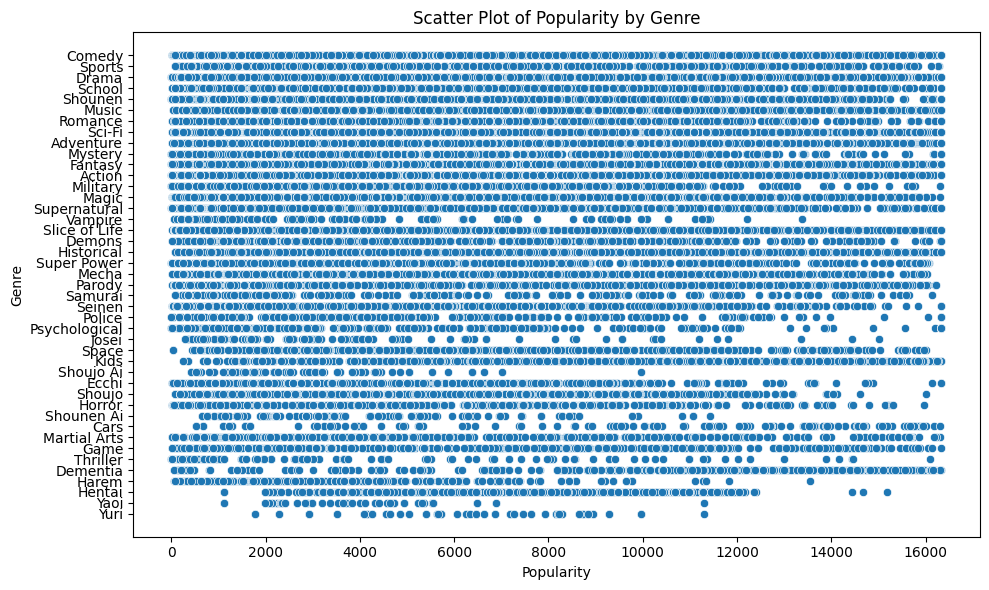

In [338]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Genre', data=separated_data)
plt.title('Scatter Plot of Popularity by Genre')
plt.tight_layout()
plt.show()

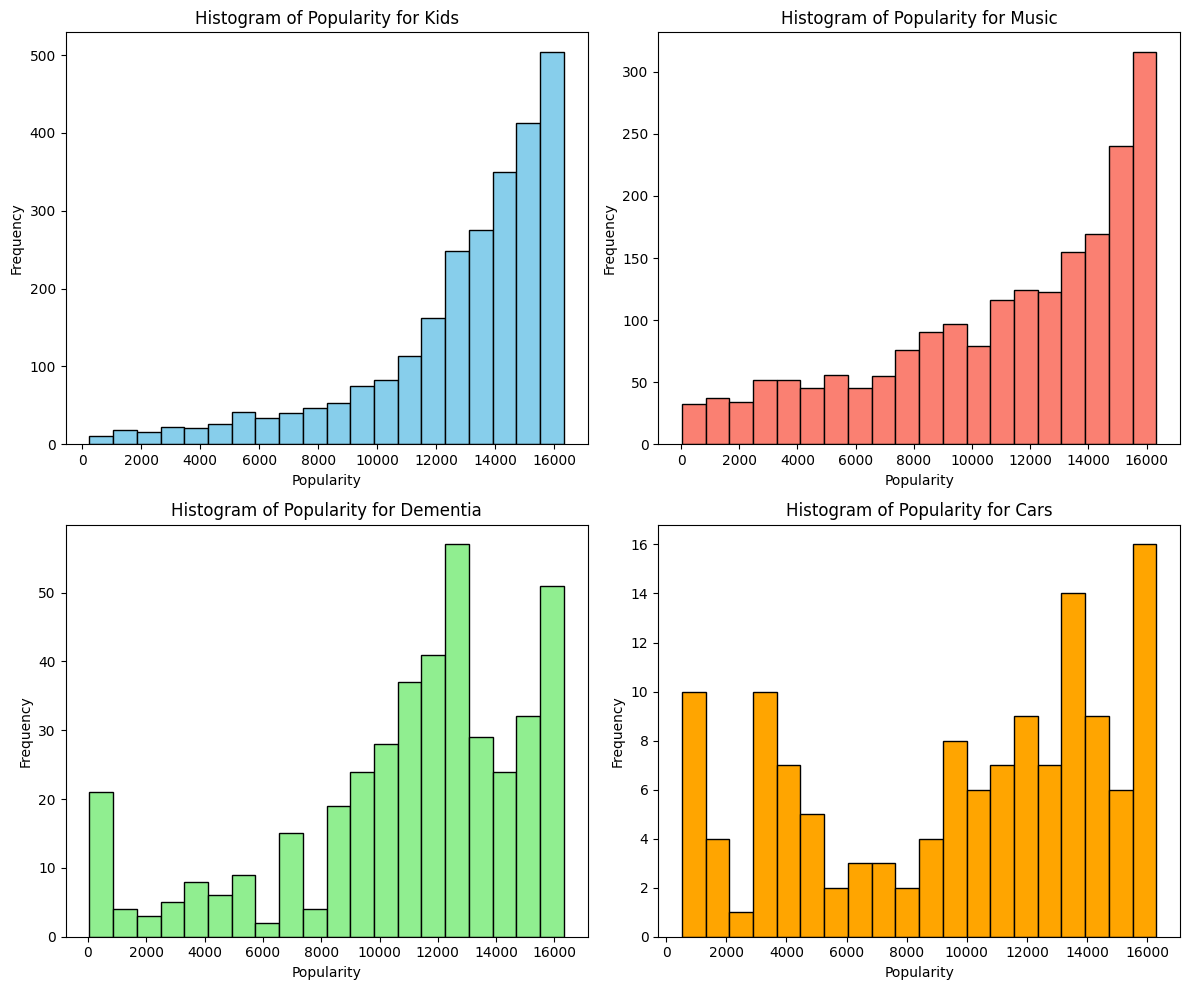

In [339]:
# Calculate the mean popularity for each genre
genre_popularity = separated_data.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)

# Select the top 4 genres
top_genres = genre_popularity.head(4)

# Define colors for each genre
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each genre with different colors
for i, (genre, mean_popularity) in enumerate(top_genres.items()):
    ax = axes[i//2, i%2]
    genre_data = separated_data[separated_data['Genre'] == genre]
    ax.hist(genre_data['Popularity'], bins=20, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of Popularity for {genre}')
    ax.set_xlabel('Popularity')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

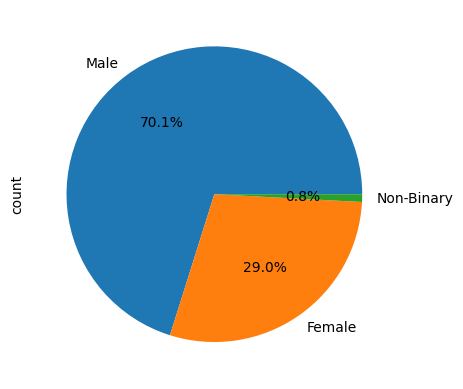

In [340]:
# Shows the distribution of gender in the dataset
final_df['gender'].unique()
final_df['gender'].value_counts().plot.pie(autopct='%1.1f%%')

#### Cleaning the merged dataset:

#### Checking for missing values in the merged DataFrame

In [341]:
# Merging datasets:
try:
    merged_data = pd.merge(animes, reviews, on='uid', how='inner')
    merged_data = pd.merge(merged_data, profiles, on='profile', how='inner')

    print("Merge successful!")
    print("Merged dataset:")
    print(merged_data.head())
except KeyError as e:
    print("KeyError:", e)

Merge successful!
Merged dataset:
     uid                    title  \
0  23273  Shigatsu wa Kimi no Uso   
1  23273  Shigatsu wa Kimi no Uso   
2  23273  Shigatsu wa Kimi no Uso   
3  23273  Shigatsu wa Kimi no Uso   
4  23273  Shigatsu wa Kimi no Uso   

                                            synopsis  \
0  Music accompanies the path of the human metron...   
1  Music accompanies the path of the human metron...   
2  Music accompanies the path of the human metron...   
3  Music accompanies the path of the human metron...   
4  Music accompanies the path of the human metron...   

                                               genre  \
0  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
1  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
2  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
3  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
4  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   

                          aired  episodes  members  popularity  ranke

In [342]:
rows, columns = merged_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)
print(merged_data.columns)

Number of rows: 31738
Number of columns: 22
Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score_x', 'img_url', 'link_x', 'profile',
       'anime_uid', 'text', 'score_y', 'scores', 'link_y', 'gender',
       'birthday', 'favorites_anime', 'link'],
      dtype='object')


In [343]:
#### Droping unnecessary columns from dataframe

columns_to_drop = columns_to_drop = ['favorites_anime', 'link', 'synopsis', 'episodes',  
                    'score', 'img_url', 
                   'text', 'score', 'scores', 'link_y', 'link_x', 
                   'uid', 'anime_uid', 'profile'
                  ]

merged_data.drop(columns=columns_to_drop, inplace=True, errors='ignore') 
print(merged_data.head())


                     title                                              genre  \
0  Shigatsu wa Kimi no Uso  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
1  Shigatsu wa Kimi no Uso  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
2  Shigatsu wa Kimi no Uso  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
3  Shigatsu wa Kimi no Uso  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
4  Shigatsu wa Kimi no Uso  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   

                          aired  members  popularity  ranked  score_x  \
0  Oct 10, 2014 to Mar 20, 2015   995473          28    24.0     8.83   
1  Oct 10, 2014 to Mar 20, 2015   995473          28    24.0     8.83   
2  Oct 10, 2014 to Mar 20, 2015   995473          28    24.0     8.83   
3  Oct 10, 2014 to Mar 20, 2015   995473          28    24.0     8.83   
4  Oct 10, 2014 to Mar 20, 2015   995473          28    24.0     8.83   

   score_y  gender birthday  
0       10  Female    Jan 4  
1       10  Fe

In [344]:
merged_df = merged_data
merged_df.head()

,title,genre,aired,members,popularity,ranked,score_x,score_y,gender,birthday
0,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,28,24.0,8.83,10,Female,Jan 4
1,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,28,24.0,8.83,10,Female,Jan 4
2,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,28,24.0,8.83,10,Female,Jan 4
3,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,28,24.0,8.83,10,Female,Jan 4
4,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,28,24.0,8.83,10,Female,Jan 4


In [345]:
missing_values = merged_data.isnull().sum()
print(missing_values)

title            0
genre            0
aired            0
members          0
popularity       0
ranked        4789
score_x        661
score_y          0
gender        5153
birthday      8038
dtype: int64


In [346]:
merged_data.nunique()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31738 entries, 0 to 31737
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       31738 non-null  object 
 1   genre       31738 non-null  object 
 2   aired       31738 non-null  object 
 3   members     31738 non-null  int64  
 4   popularity  31738 non-null  int64  
 5   ranked      26949 non-null  float64
 6   score_x     31077 non-null  float64
 7   score_y     31738 non-null  int64  
 8   gender      26585 non-null  object 
 9   birthday    23700 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.4+ MB


In [347]:
# Cleaning genre column
# Replacing inconsistent/ duplicate genre values
merged_data['genre'] = merged_data['genre'].str.replace("'", "").str.strip()

# Removing unwanted characters from the column names
merged_data['genre'] = merged_data['genre'].str.replace(r'[\[\]]', '', regex=True)      
merged_data['genre'] = merged_data['genre'].str.replace(r'\'', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\"', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\\', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'/', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'&', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)     

In [348]:
print(merged_data['genre'])

0        Drama,Music,Romance,School,Shounen
1        Drama,Music,Romance,School,Shounen
2        Drama,Music,Romance,School,Shounen
3        Drama,Music,Romance,School,Shounen
4        Drama,Music,Romance,School,Shounen
                        ...                
31733     Military,Sci-Fi,Space,Drama,Mecha
31734     Military,Sci-Fi,Space,Drama,Mecha
31735     Military,Sci-Fi,Space,Drama,Mecha
31736     Military,Sci-Fi,Space,Drama,Mecha
31737     Military,Sci-Fi,Space,Drama,Mecha
Name: genre, Length: 31738, dtype: object


In [349]:
# Converting 'birthday' column to datetime data type and handling errors
merged_data['birthday'] = pd.to_datetime(merged_data['birthday'], format='%b %d, %Y', errors='coerce')
print(merged_data['birthday'])

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
31733   NaT
31734   NaT
31735   NaT
31736   NaT
31737   NaT
Name: birthday, Length: 31738, dtype: datetime64[ns]


In [350]:
 #Calculating the age based on current date

current_date = datetime.now()
merged_data['age'] = (current_date - merged_data['birthday']) // pd.Timedelta(days=365)
print(merged_data)

                                          title  \
0                       Shigatsu wa Kimi no Uso   
1                       Shigatsu wa Kimi no Uso   
2                       Shigatsu wa Kimi no Uso   
3                       Shigatsu wa Kimi no Uso   
4                       Shigatsu wa Kimi no Uso   
...                                         ...   
31733  Mobile Suit Gundam: Char's Counterattack   
31734  Mobile Suit Gundam: Char's Counterattack   
31735  Mobile Suit Gundam: Char's Counterattack   
31736  Mobile Suit Gundam: Char's Counterattack   
31737  Mobile Suit Gundam: Char's Counterattack   

                                    genre                         aired  \
0      Drama,Music,Romance,School,Shounen  Oct 10, 2014 to Mar 20, 2015   
1      Drama,Music,Romance,School,Shounen  Oct 10, 2014 to Mar 20, 2015   
2      Drama,Music,Romance,School,Shounen  Oct 10, 2014 to Mar 20, 2015   
3      Drama,Music,Romance,School,Shounen  Oct 10, 2014 to Mar 20, 2015   
4      Drama

In [351]:
# Droping birthday column from merged_data
merged_data.drop("birthday", axis=1, inplace=True)

In [352]:
# Removing rows where age couldn't be calculated
merged_data.dropna(subset=['age'], inplace=True)  

In [353]:
#Calculating the mean age
mean_age = merged_data['age'].mean()
print("Mean Age:", mean_age)

Mean Age: 35.00440683941477


In [354]:
# Filling the missing values in the 'age' column with the mean age
merged_data['age'].fillna(mean_age, inplace=True)

C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\3104828233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['age'].fillna(mean_age, inplace=True)


In [355]:
# Checking for and handling any outliers or unrealistic age values 
#  Assuming ages above 100 or below 10 are unrealistic for your dataset
merged_data = merged_data[(merged_data['age'] <= 100) & (merged_data['age'] >= 10)]

In [356]:
# Calculating the mode of gender
mode_gender = merged_data['gender'].mode()[0]
print(mode_gender)

Male


In [357]:
# Filling missing values in the 'gender' columnn with mode gender
merged_data['gender'].fillna(mode_gender, inplace=True)
merged_data.describe()

C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\4017105416.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['gender'].fillna(mode_gender, inplace=True)
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\4017105416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['gender'].fillna(mode_gender, inplace=True)


,members,popularity,ranked,score_x,score_y,age
count,1.700600e+04,17006.000000,14221.000000,16619.000000,17006.000000,17006.000000
mean,3.650469e+04,7283.454545,6509.786443,6.495087,8.011231,35.024874
std,1.090411e+05,4547.777875,4281.325774,0.979185,1.984901,6.975736
min,3.600000e+01,1.000000,9.000000,2.070000,1.000000,11.000000
25%,5.040000e+02,3571.000000,2687.000000,5.840000,7.000000,31.000000
50%,3.192500e+03,6868.500000,6456.000000,6.460000,9.000000,34.000000
75%,1.598800e+04,11005.000000,9992.000000,7.180000,10.000000,37.000000
max,1.871043e+06,16334.000000,14675.000000,9.020000,10.000000,94.000000


In [358]:
# Imputing 'ranked' with max rank + 1
max_rank = merged_data['ranked'].max()
merged_data['ranked'].fillna(value=max_rank + 1, inplace=True)

# Checking the distribution of 'score_x' to decide on mean or median
score_x_median = merged_data['score_x'].median()
merged_data['score_x'].fillna(value=score_x_median, inplace=True)

C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1375346174.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['ranked'].fillna(value=max_rank + 1, inplace=True)
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1375346174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['ranked'].fillna(value=max_rank + 1, inplace=T

In [359]:
missing_values = merged_data.isnull().sum()
print(missing_values)

title         0
genre         0
aired         0
members       0
popularity    0
ranked        0
score_x       0
score_y       0
gender        0
age           0
dtype: int64


In [360]:
print(merged_data)
final_df = merged_data

                                  title  \
8                         Made in Abyss   
9                         Made in Abyss   
10     Kizumonogatari III: Reiketsu-hen   
11        Sen to Chihiro no Kamikakushi   
12        Sen to Chihiro no Kamikakushi   
...                                 ...   
31726                    Daa! Daa! Daa!   
31727                    Romeo x Juliet   
31728                    Romeo x Juliet   
31729                    Romeo x Juliet   
31730                    Romeo x Juliet   

                                        genre                         aired  \
8      Sci-Fi,Adventure,Mystery,Drama,Fantasy   Jul 7, 2017 to Sep 29, 2017   
9      Sci-Fi,Adventure,Mystery,Drama,Fantasy   Jul 7, 2017 to Sep 29, 2017   
10        Action,Mystery,Supernatural,Vampire                   Jan 6, 2017   
11               Adventure,Supernatural,Drama                  Jul 20, 2001   
12               Adventure,Supernatural,Drama                  Jul 20, 2001   
...      

In [361]:

# Creating a new feature for the count of genres a user likes
merged_data['num_genres'] = merged_data['genre'].apply(lambda x: len(x.split(',')))

# Checking the first few rows to verify
print(merged_data[['genre', 'num_genres']].tail())

                                  genre  num_genres
31726              Comedy,Sci-Fi,Shoujo           3
31727  Drama,Fantasy,Historical,Romance           4
31728  Drama,Fantasy,Historical,Romance           4
31729  Drama,Fantasy,Historical,Romance           4
31730  Drama,Fantasy,Historical,Romance           4


C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1669173421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['num_genres'] = merged_data['genre'].apply(lambda x: len(x.split(',')))


In [362]:
# Adjust splitting and ensure genres are stripped of any leading/trailing whitespace
merged_data['genre'] = merged_data['genre'].apply(lambda x: [i.strip() for i in x.split(',')])


C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1504598102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['genre'] = merged_data['genre'].apply(lambda x: [i.strip() for i in x.split(',')])


In [363]:

print(merged_data['genre'].head())

8     [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
9     [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
10        [Action, Mystery, Supernatural, Vampire]
11                [Adventure, Supernatural, Drama]
12                [Adventure, Supernatural, Drama]
Name: genre, dtype: object


In [364]:
# Preparing the data for the Apriori algorithm with TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(merged_data['genre']).transform(merged_data['genre'])
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori algorithm      
frequent_genres = apriori(df_te, min_support=0.01, use_colnames=True)
frequent_genres = frequent_genres[frequent_genres['itemsets'].apply(lambda x: len(x)) >= 3]

print(frequent_genres.sort_values(by='support', ascending=False).head())


      support                      itemsets
164  0.032459       (Sci-Fi, Action, Mecha)
168  0.031989  (Adventure, Comedy, Fantasy)
153  0.031283  (Adventure, Action, Fantasy)
158  0.026990     (Comedy, Action, Shounen)
151  0.026520   (Adventure, Comedy, Action)


In [365]:
#Defining the top combinations of genres
top_combinations = [
    ['Sci-Fi', 'Mecha', 'Action'],
    ['Fantasy', 'Adventure', 'Comedy'],
    ['Fantasy', 'Adventure', 'Action'],
    ['Shounen', 'Action', 'Comedy'],
    ['Adventure', 'Action', 'Comedy']
]


In [366]:
def contains_all_genres(anime_genres, genre_combination):
    return set(genre_combination).issubset(set(anime_genres))



In [367]:
# Creating binary features for each combination
for i, combination in enumerate(top_combinations, start=1):
    column_name = f'combo_{i}'
    merged_data[column_name] = merged_data['genre'].apply(lambda x: contains_all_genres(x, combination)).astype(int)

C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1873931083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[column_name] = merged_data['genre'].apply(lambda x: contains_all_genres(x, combination)).astype(int)
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1873931083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[column_name] = merged_data['genre'].apply(lambda x: contains_all_genres(x, combination)).astype(int)
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1873931083.py

In [368]:
# Displaying the DataFrame to verify the new columns
print(merged_data[['genre', 'combo_1', 'combo_2', 'combo_3', 'combo_4', 'combo_5']])


                                              genre  combo_1  combo_2  \
8      [Sci-Fi, Adventure, Mystery, Drama, Fantasy]        0        0   
9      [Sci-Fi, Adventure, Mystery, Drama, Fantasy]        0        0   
10         [Action, Mystery, Supernatural, Vampire]        0        0   
11                 [Adventure, Supernatural, Drama]        0        0   
12                 [Adventure, Supernatural, Drama]        0        0   
...                                             ...      ...      ...   
31726                      [Comedy, Sci-Fi, Shoujo]        0        0   
31727         [Drama, Fantasy, Historical, Romance]        0        0   
31728         [Drama, Fantasy, Historical, Romance]        0        0   
31729         [Drama, Fantasy, Historical, Romance]        0        0   
31730         [Drama, Fantasy, Historical, Romance]        0        0   

       combo_3  combo_4  combo_5  
8            0        0        0  
9            0        0        0  
10           0    

In [369]:
# Cleaning genre column

merged_data['genre'] = merged_data['genre'].astype(str)

merged_data['genre'] = merged_data['genre'].str.replace("'", "").str.strip()
merged_data['genre'] = merged_data['genre'].str.replace(r'[\[\]]', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\'', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\"', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\\', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'/', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'&', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)
merged_data['genre']


C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1207496122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['genre'] = merged_data['genre'].astype(str)
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1207496122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['genre'] = merged_data['genre'].str.replace("'", "").str.strip()
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\1207496122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

8        Sci-Fi,Adventure,Mystery,Drama,Fantasy
9        Sci-Fi,Adventure,Mystery,Drama,Fantasy
10          Action,Mystery,Supernatural,Vampire
11                 Adventure,Supernatural,Drama
12                 Adventure,Supernatural,Drama
                          ...                  
31726                      Comedy,Sci-Fi,Shoujo
31727          Drama,Fantasy,Historical,Romance
31728          Drama,Fantasy,Historical,Romance
31729          Drama,Fantasy,Historical,Romance
31730          Drama,Fantasy,Historical,Romance
Name: genre, Length: 17006, dtype: object

In [370]:
# Spliting genres into individual columns
genre_dummies = merged_data['genre'].str.get_dummies(sep=',')
print(genre_dummies)

       Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  \
8           0          1     0       0         0       0      1      0   
9           0          1     0       0         0       0      1      0   
10          1          0     0       0         0       0      0      0   
11          0          1     0       0         0       0      1      0   
12          0          1     0       0         0       0      1      0   
...       ...        ...   ...     ...       ...     ...    ...    ...   
31726       0          0     0       1         0       0      0      0   
31727       0          0     0       0         0       0      1      0   
31728       0          0     0       0         0       0      1      0   
31729       0          0     0       0         0       0      1      0   
31730       0          0     0       0         0       0      1      0   

       Fantasy  Game  ...  ShounenAi  SliceofLife  Space  Sports  SuperPower  \
8            1     0  ...      

In [371]:
# Converting column names to lowercase
genre_dummies.columns = genre_dummies.columns.str.lower()

In [372]:

# Cleaning whitespaces in genres
genre_dummies.columns = genre_dummies.columns.str.strip()

In [373]:
#Checking the unique genre column names
unique_genres = genre_dummies.columns.unique()
print(unique_genres)

Index(['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama',
       'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror',
       'josei', 'kids', 'magic', 'martialarts', 'mecha', 'military', 'music',
       'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai',
       'school', 'sci-fi', 'seinen', 'shoujo', 'shoujoai', 'shounen',
       'shounenai', 'sliceoflife', 'space', 'sports', 'superpower',
       'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype='object')


In [374]:
# Sorting columns alphabetically
genre_dummies = genre_dummies.reindex(sorted(genre_dummies.columns), axis=1)


In [375]:
# Removing unwanted characters from the column names
genre_dummies.columns = genre_dummies.columns.str.replace('[\[\]]', '', regex=True)

# Fixing any potential duplicates due to this cleanup (e.g., "adventure " and "adventure")
genre_dummies = genre_dummies.groupby(genre_dummies.columns, axis=1).sum()

<>:2: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\['
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\985151215.py:2: SyntaxWarning: invalid escape sequence '\['
  genre_dummies.columns = genre_dummies.columns.str.replace('[\[\]]', '', regex=True)
C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\985151215.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  genre_dummies = genre_dummies.groupby(genre_dummies.columns, axis=1).sum()


In [376]:
# Droping any unnamed or empty columns if they exist
genre_dummies= genre_dummies.loc[:, ~genre_dummies.columns.str.contains('^Unnamed')]

# Removing columns with empty names
genre_dummies = genre_dummies.loc[:, ~genre_dummies.columns.str.match('^$')]  

In [377]:
# Displaying the cleaned genre_dummies DataFrame
print(genre_dummies)
print(genre_dummies.columns)

       action  adventure  cars  comedy  dementia  demons  drama  ecchi  \
8           0          1     0       0         0       0      1      0   
9           0          1     0       0         0       0      1      0   
10          1          0     0       0         0       0      0      0   
11          0          1     0       0         0       0      1      0   
12          0          1     0       0         0       0      1      0   
...       ...        ...   ...     ...       ...     ...    ...    ...   
31726       0          0     0       1         0       0      0      0   
31727       0          0     0       0         0       0      1      0   
31728       0          0     0       0         0       0      1      0   
31729       0          0     0       0         0       0      1      0   
31730       0          0     0       0         0       0      1      0   

       fantasy  game  ...  shounenai  sliceoflife  space  sports  \
8            1     0  ...          0       

In [378]:
genre_dummies


,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,...,shounenai,sliceoflife,space,sports,supernatural,superpower,thriller,vampire,yaoi,yuri
8,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31726,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31727,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31728,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31729,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [379]:
# Creating a list of genre columns
genres = genre_dummies.columns

# Concatenating the genre columns with the existing dataframe
df = pd.concat([merged_data, genre_dummies], axis=1)

# Displaying the merged dataframe
print(df)

                                  title  \
8                         Made in Abyss   
9                         Made in Abyss   
10     Kizumonogatari III: Reiketsu-hen   
11        Sen to Chihiro no Kamikakushi   
12        Sen to Chihiro no Kamikakushi   
...                                 ...   
31726                    Daa! Daa! Daa!   
31727                    Romeo x Juliet   
31728                    Romeo x Juliet   
31729                    Romeo x Juliet   
31730                    Romeo x Juliet   

                                        genre                         aired  \
8      Sci-Fi,Adventure,Mystery,Drama,Fantasy   Jul 7, 2017 to Sep 29, 2017   
9      Sci-Fi,Adventure,Mystery,Drama,Fantasy   Jul 7, 2017 to Sep 29, 2017   
10        Action,Mystery,Supernatural,Vampire                   Jan 6, 2017   
11               Adventure,Supernatural,Drama                  Jul 20, 2001   
12               Adventure,Supernatural,Drama                  Jul 20, 2001   
...      

In [380]:
# Extracting age column from merged_data
age_column = df['age']
print(age_column)

8        27.0
9        27.0
10       33.0
11       39.0
12       39.0
         ... 
31726    39.0
31727    36.0
31728    36.0
31729    36.0
31730    36.0
Name: age, Length: 17006, dtype: float64


In [381]:
#Droping the genre and column from the dataframe
df.drop('genre', axis=1, inplace=True)

In [382]:
#Encoding the gender column
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the "gender" column
df['gender'] = encoder.fit_transform(df['gender'])

In [383]:
df.columns

Index(['title', 'aired', 'members', 'popularity', 'ranked', 'score_x',
       'score_y', 'gender', 'age', 'num_genres', 'combo_1', 'combo_2',
       'combo_3', 'combo_4', 'combo_5', 'action', 'adventure', 'cars',
       'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game',
       'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic',
       'martialarts', 'mecha', 'military', 'music', 'mystery', 'parody',
       'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi',
       'seinen', 'shoujo', 'shoujoai', 'shounen', 'shounenai', 'sliceoflife',
       'space', 'sports', 'supernatural', 'superpower', 'thriller', 'vampire',
       'yaoi', 'yuri'],
      dtype='object')

In [384]:
genres = df.columns

#### Data Visualization


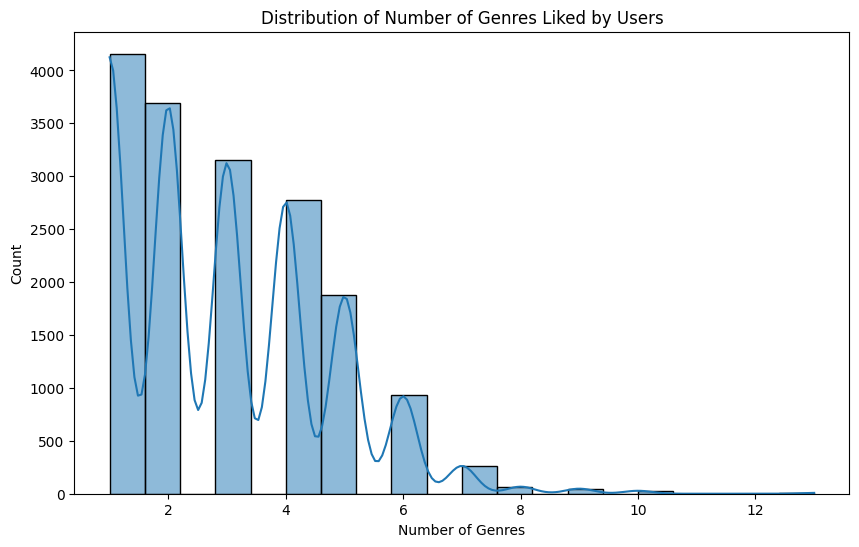

In [385]:
# Visualization 1: Genre Count Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_genres', bins=20, kde=True)
plt.title('Distribution of Number of Genres Liked by Users')
plt.xlabel('Number of Genres')
plt.ylabel('Count')
plt.show()

C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\2052966149.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combos, x='frequency', y='genre_combo', palette='viridis')


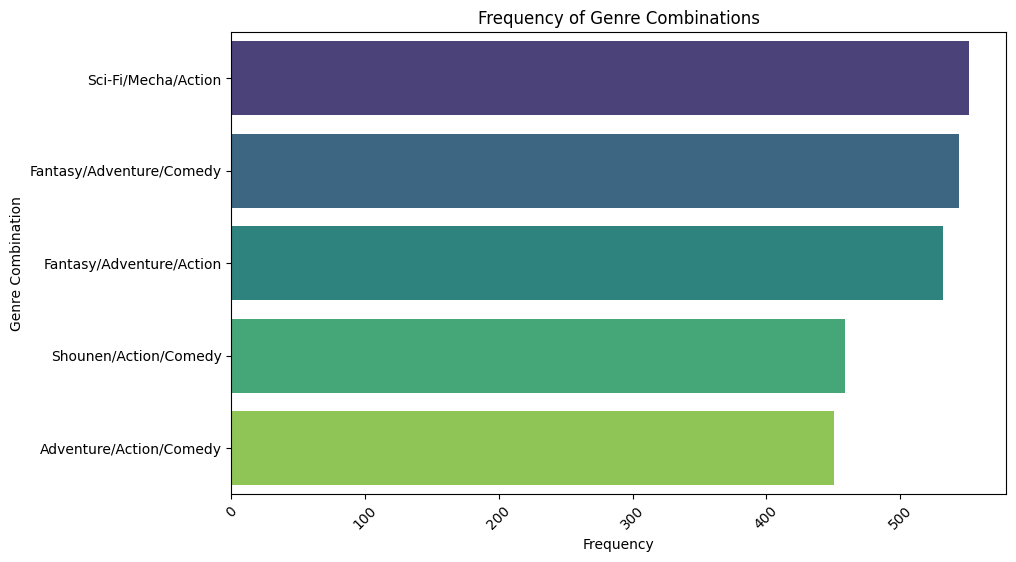

In [386]:
#Visualization 2: Most Frequent Genre Combinations

data = {
    'genre_combo': ['combo_1', 'combo_2', 'combo_3', 'combo_4', 'combo_5'],
    'frequency': [
        df['combo_1'].sum(), 
        df['combo_2'].sum(),
        df['combo_3'].sum(),
        df['combo_4'].sum(),
        df['combo_5'].sum()
    ]
}
df_combos = pd.DataFrame(data)

# Mapping combo identifiers to actual genre names
combo_names = {
    'combo_1': 'Sci-Fi/Mecha/Action',
    'combo_2': 'Fantasy/Adventure/Comedy',
    'combo_3': 'Fantasy/Adventure/Action',
    'combo_4': 'Shounen/Action/Comedy',
    'combo_5': 'Adventure/Action/Comedy'  
}
df_combos['genre_combo'] = df_combos['genre_combo'].map(combo_names)

# Sorting by frequency after mapping
df_combos = df_combos.sort_values('frequency', ascending=False)

# Plotting barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combos, x='frequency', y='genre_combo', palette='viridis')
plt.title('Frequency of Genre Combinations')
plt.xlabel('Frequency')
plt.ylabel('Genre Combination')
plt.xticks(rotation=45)
plt.show()


C:\Users\aryal\AppData\Local\Temp\ipykernel_9528\2044198641.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


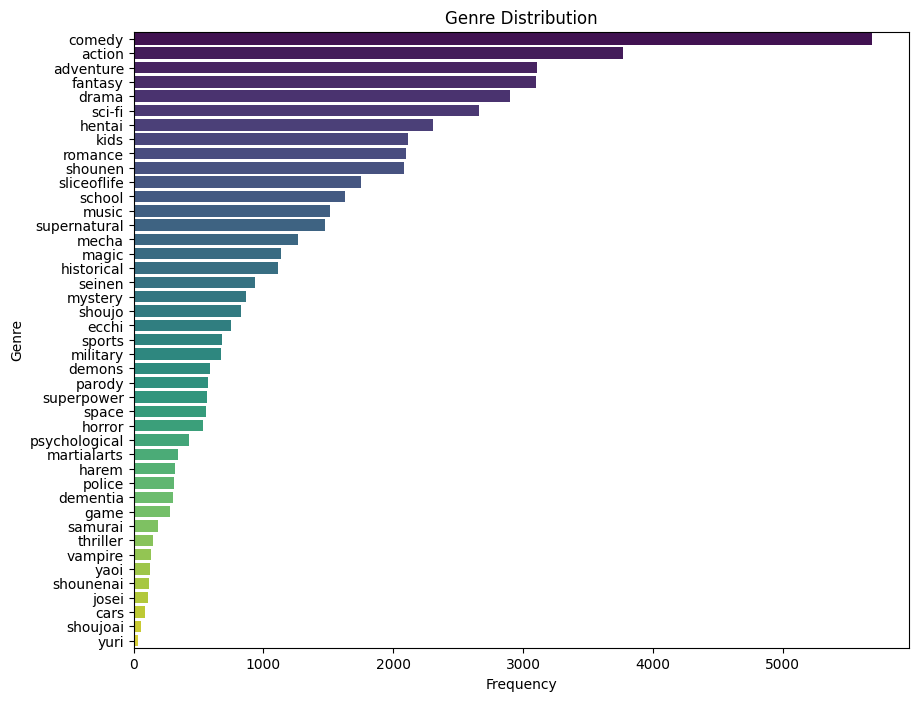

In [387]:
#Visualization 3: Genre Distribution

# Summing up each genre column to get the total count for each genre
genre_counts = df.loc[:, 'action':'yuri'].sum().sort_values(ascending=False)

# Plotting the genre distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

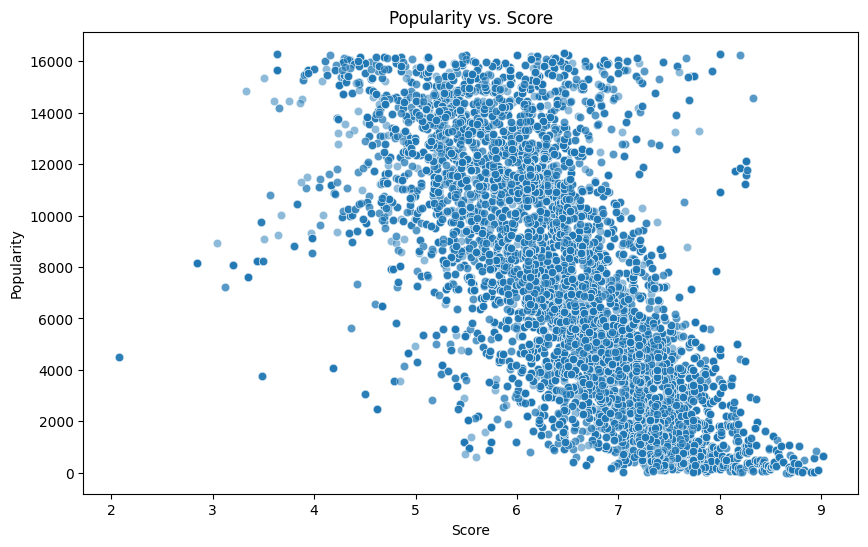

In [388]:
# Visualization 4: Popularity vs. Score

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score_x', y='popularity', alpha=0.5)
plt.title('Popularity vs. Score')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.show()

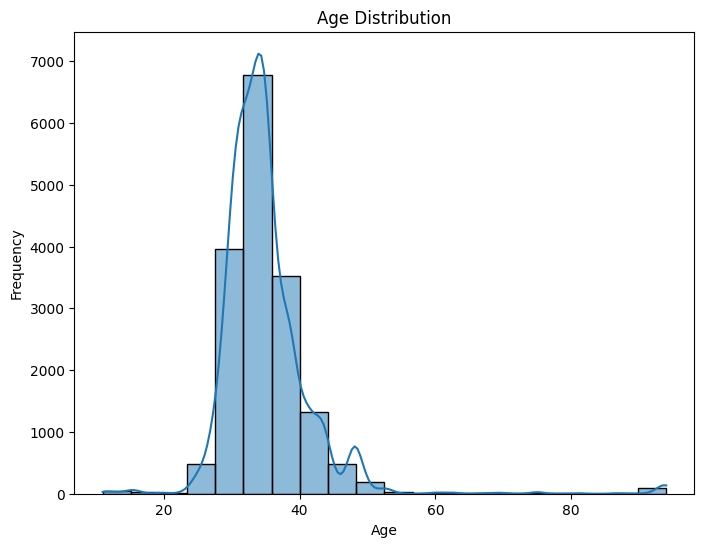

In [389]:
# Visualization 5: Age Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [390]:
df
X=df

## Model Building

Predicting Age

In [391]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['age'], test_size=0.2, random_state=42)

# Create an instance of the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


ValueError: could not convert string to float: 'Guitar'

In [ ]:
from pyexpat import model
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the StratifiedKFold object
stratified_cv = StratifiedKFold(n_splits=2)

# Create the GridSearchCV object with Stratified Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_cv)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got <module 'pyexpat.model'> instead.

Predicting genre

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

feature_columns = ['members', 'popularity', 'ranked', 'score_x', 'score_y', 'gender',
                   'age', 'num_genres', 'combo_1', 'combo_2', 'combo_3', 'combo_4',
                   'combo_5']
genre_columns = ['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama',
                 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror',
                 'josei', 'kids', 'magic', 'martialarts', 'mecha', 'military', 'music',
                 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai',
                 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujoai', 'shounen', 
                 'shounenai', 'sliceoflife', 'space', 'sports', 'supernatural', 
                 'superpower', 'thriller', 'vampire', 'yaoi', 'yuri']  # Genre columns

# Separating features and target variables
X = df[feature_columns]
y = df[genre_columns]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the multi-output classifier
forest = RandomForestClassifier(random_state=42)
model = MultiOutputClassifier(forest, n_jobs=-1)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

Accuracy: 0.9447383891828336


In [ ]:
from sklearn.metrics import classification_report

# Converting y_test and y_pred to boolean arrays 
y_test_bool = y_test.astype(bool)
y_pred_bool = y_pred.astype(bool)

# Generating classification report
report = classification_report(y_test_bool, y_pred_bool, target_names=genre_columns)

print(report)

               precision    recall  f1-score   support

       action       0.99      0.97      0.98       773
    adventure       0.98      0.97      0.97       641
         cars       1.00      0.92      0.96        12
       comedy       0.98      0.96      0.97      1155
     dementia       0.99      0.95      0.97        74
       demons       1.00      0.92      0.96       105
        drama       0.99      0.96      0.98       571
        ecchi       1.00      0.94      0.97       140
      fantasy       0.99      0.95      0.97       618
         game       1.00      0.98      0.99        60
        harem       1.00      0.87      0.93        61
       hentai       1.00      1.00      1.00       455
   historical       1.00      0.97      0.98       235
       horror       1.00      0.91      0.95       111
        josei       1.00      1.00      1.00        22
         kids       1.00      0.96      0.98       428
        magic       1.00      0.94      0.97       216
  martial

C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score
from sklearn.multioutput import MultiOutputClassifier

# Defining model
model_genre = MultiOutputClassifier(RandomForestClassifier(random_state=42), n_jobs=-1)

# Setting up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)


# Defining scorers
scoring = {
    'precision': make_scorer(precision_score, average='samples', zero_division=0),
    'recall': make_scorer(recall_score, average='samples', zero_division=0),
    'f1': make_scorer(f1_score, average='samples', zero_division=0)
}

# Runing cross-validation

cv_results = cross_validate(model_genre, X, y, cv=cv, scoring=scoring)

# Printing the average scores
print(f"Precision: {np.mean(cv_results['test_precision'])}")
print(f"Recall: {np.mean(cv_results['test_recall'])}")
print(f"F1: {np.mean(cv_results['test_f1'])}")

C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

Precision: 0.9538040957855936
Recall: 0.9465198714767469
F1: 0.9486501611170075


In [ ]:
import pickle

# Optionally, fitting the model on the entire dataset for future use
model_genre.fit(X, y)

# Pickling the fitted model and the cross-validation results
with open('model_genre_find.pkl', 'wb') as f:
    pickle.dump({'model': model_genre, 'cv_results': cv_results}, f)

print("Model and results have been saved to 'model_and_results.pkl'.")


C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

Model and results have been saved to 'model_and_results.pkl'.


In [ ]:
import numpy as np
import pickle

# Function to load the trained model
def load_model(filename='model_genre_find.pkl'):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
        model = data['model']  # Make sure to extract the model correctly
    return model

# Function to process user input
def get_user_input():
    print("Enter number of episodes:")
    episodes = float(input())
    print("Enter popularity score:")
    popularity = float(input())
    return np.array([[episodes, popularity]])

# Function to make a prediction
def make_prediction(model, user_input):
    prediction = model.predict(user_input)
    return prediction

# Main function to control the workflow
def main():
    model = load_model()  # Load the model
    user_input = get_user_input()  # Get user input
    prediction = make_prediction(model, user_input)  # Make a prediction with the model
    print(f"Predicted genres: {prediction}")

if __name__ == "__main__":
    main()


Enter number of episodes:


ValueError: could not convert string to float: '10  20'

In [ ]:
anime_data = animes_df

In [ ]:
anime_data.dropna(subset=['synopsis', 'episodes', 'ranked', 'img_url'], inplace=True)
anime_data

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


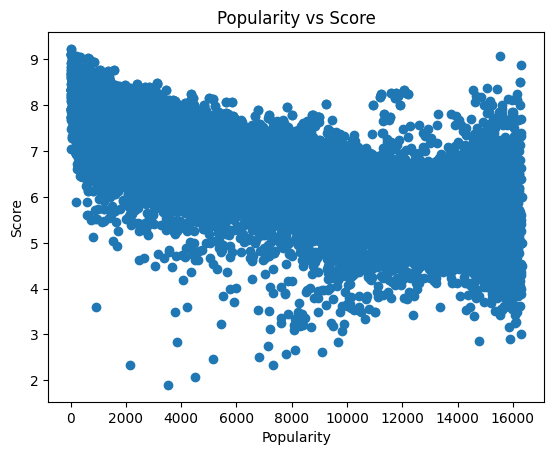

In [ ]:
# Scatter plot of popularity vs score
plt.scatter(anime_data['popularity'], anime_data['score'])

# Set the plot title and labels
plt.title('Popularity vs Score')
plt.xlabel('Popularity')
plt.ylabel('Score')

# Show the plot
plt.show()

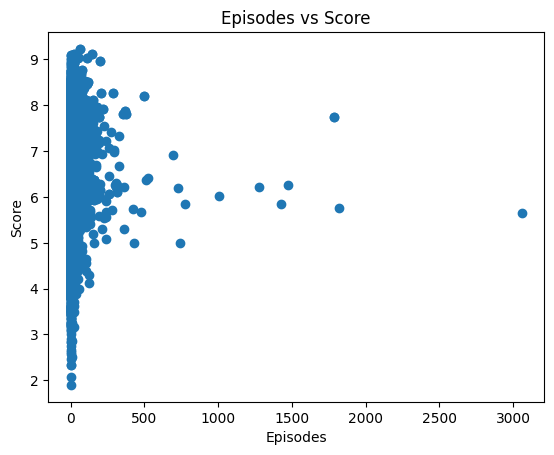

In [ ]:
plt.scatter(anime_data['episodes'], anime_data['score'])
plt.title('Episodes vs Score')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

In [ ]:
correlation = anime_data['episodes'].corr(anime_data['score'])
print("Correlation between episodes and score:", correlation)

Correlation between episodes and score: 0.0746631748119776


<Axes: >

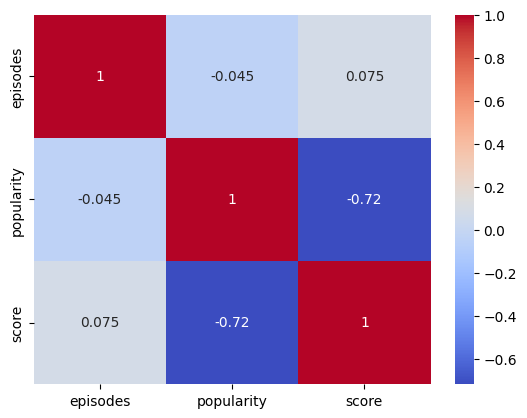

In [ ]:
import seaborn as sns

# Select the columns for the heatmap
heatmap_data = anime_data[['episodes', 'popularity', 'score']]

# Plot the heatmap
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')

In [ ]:
anime_data.shape

(15187, 12)

In [ ]:
#Decision tree and randon forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# Select the features and target variable
anime_data = animes_df

features = anime_data[['episodes', 'popularity']]
target = anime_data['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the model
model_score = LinearRegression()
model_score.fit(X_train, y_train)

# Make predictions
y_pred = model_score.predict(X_test)

# Evaluate the model
mse_lr= mean_squared_error(y_test, y_pred)
rmse_lr= np.sqrt(mse_lr)

r_squared_lr = model_score.score(X_test, y_test)
# Create and train the decision tree model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Make predictions using the decision tree model
y_pred_dt = decision_tree.predict(X_test)
r_squared_dt = decision_tree.score(X_test, y_test)

# Evaluate the decision tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Create and train the k-NN model
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

#Evaluate the knn model
mse_knn = mean_squared_error(y_test, y_pred)
r_squared_knn = knn.score(X_test, y_test)


# Create and train the random forest model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Make predictions using the random forest model
y_pred_rf = random_forest.predict(X_test)

# Evaluate the random forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = random_forest.score(X_test, y_test)


import pickle
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier




# Serialize the model to a pickle file
with open('knn_classifier.pkl', 'wb') as file:
    pickle.dump(knn, file)

print("KNN Classifier has been saved to 'knn_classifier.pkl'.")


KNN Classifier has been saved to 'knn_classifier.pkl'.


In [ ]:
# Create a DataFrame to store the model names and mean squared errors
model_errors = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
    'Mean Squared Error': [mse_lr, mse_dt, mse_rf, mse_knn],
    'r_squared': [r_squared_lr, r_squared_dt, r_squared_rf, r_squared_knn]

})

# Sort the DataFrame by mean squared error in ascending order
model_errors = model_errors.sort_values('Mean Squared Error')

# Print the model errors
print(model_errors)

                 Model  Mean Squared Error  r_squared
3  K-Nearest Neighbors            0.532097   0.521377
0    Linear Regression            0.546340   0.508566
2        Random Forest            0.578115   0.479984
1        Decision Tree            0.800366   0.280069


In [ ]:
import pickle
import numpy as np

# Function to load the model
def load_model(path='knn_classifier.pkl'):
    with open(path, 'rb') as file:
        model = pickle.load(file)
    return model

# Function to get user input
def get_user_input():
    # Example with 20 features
    print("Enter the values for each feature separated by space:")
    input_values = input()
    feature_list = list(map(float, input_values.split()))
    return np.array([feature_list])  # Return as 2D array suitable for sklearn

# Function to make a prediction
def make_prediction(model, user_input):
    prediction = model.predict(user_input)
    return prediction

# Main flow
if __name__ == "__main__":
    # Load the model
    knn_model = load_model()

    # Get user input
    user_input = get_user_input()

    # Predict using the loaded model
    prediction = make_prediction(knn_model, user_input)

    # Output the result
    print(f"The predicted score for the input data is: {prediction[0]}")


Enter the values for each feature separated by space:
The predicted score for the input data is: 8.267000000000001


C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
